In [32]:
import pandas as pd
import numpy as np
from ggplot import *
import PIL
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [9]:
data_url = "../galton-data.csv"
#print(data_url)
galton_data = pd.read_csv(data_url,encoding = "ISO-8859-1")
#galton_data.head()
data_url = '../AnnualSpending.csv'
spend_data = pd.read_csv(data_url)
#spend_data.head()
data_url = '../data.worldbank.org.csv'
world_bank_data = pd.read_csv(data_url,encoding = "ISO-8859-1")
world_bank_data = world_bank_data.replace({"..":np.nan,"?":np.nan})
#world_bank_data.head()
#galton_data.head()

In [10]:
galton_height_gender_cols = galton_data[["height","gender"]]
galton_height_gender_cols.head()

,height,gender
0,73.2,M
1,69.2,F
2,69.0,F
3,69.0,F
4,73.5,M


In [11]:
world_bank_data.head()
print("Total number of rows which have NAN value: ",world_bank_data.shape[0]-world_bank_data.dropna().shape[0])
world_bank_data = world_bank_data[["Country","Life.expectancy","Infant.mortality","Per.capita.income","Literacy"]]
world_bank_data = world_bank_data.dropna()
world_bank_country = world_bank_data[["Country"]]
world_bank_data = world_bank_data.reset_index().drop(['index','Country'],axis=1)
world_bank_data.head()
#print(world_bank_data.shape[0])

Total number of rows which have NAN value:  172


,Life.expectancy,Infant.mortality,Per.capita.income,Literacy
0,52.26687805,96,4102.11859,70.77841
1,75.93763415,5.8,14128.87855,98.95
2,70.76321951,27.9,5496.34464,99.78936
3,71.62590244,30.7,1211.701531,59.72154
4,76.4332439,5.1,4197.807304,98.26413


In [12]:
ggplot(galton_height_gender_cols,aes(x='height', color='gender')) + geom_density(alpha = 1) + xlab("Height")
k = 2
galton_2k_cluster = KMeans(n_clusters=k,random_state=0).fit(galton_height_gender_cols.loc[:,["height"]])
cluster_label = galton_2k_cluster.predict(galton_height_gender_cols.loc[:,["height"]])
label = galton_2k_cluster.labels_
centers = galton_2k_cluster.cluster_centers_
print("Cluster Means: ", "\n", centers, "\n", "Clustering Vector: ","\n", label)

Cluster Means:  
 [[69.78419865]
 [63.81692308]] 
 Clustering Vector:  
 [0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1
 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1
 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0
 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 1 0 0 0 0 

C:\Users\Akshay\PycharmProjects\first_project\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


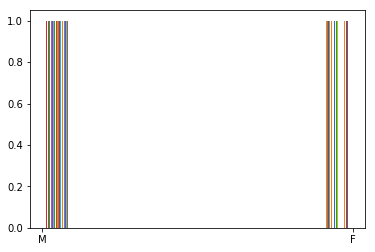

In [13]:
#cm = confusion_matrix(galton_height_gender_cols["gender"],label)
#cm = pd.Series(label)
#cm = cm.value_counts()
galton_height_gender_cols['label']=label
cm_temp = pd.crosstab(galton_height_gender_cols['gender'],galton_height_gender_cols['label'])
plt.hist(x=galton_height_gender_cols['gender'])#,galton_height_gender_cols['label'])
#print(cm_temp)
plt.show()
#print(galton_height_gender_cols["gender"].shape,label.shape)


In [14]:

world_bank_data.head()
k = 2
world_bank_2k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
k2_mean = world_bank_2k_cluster.cluster_centers_
k2_label = world_bank_2k_cluster.labels_
k = 3
world_bank_3k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
k3_mean = world_bank_3k_cluster.cluster_centers_
k3_label = world_bank_3k_cluster.labels_
print(np.asarray(k2_mean,dtype=np.float))
print(np.asarray(k3_mean,dtype=np.float))


[[8.06215732e+01 4.45000000e+00 6.37779709e+04 9.70090000e+01]
 [7.09230754e+01 2.50813953e+01 8.16167119e+03 8.78985214e+01]]
[[6.91127202e+01 2.98205882e+01 4.61503980e+03 8.52681391e+01]
 [8.06215732e+01 4.45000000e+00 6.37779709e+04 9.70090000e+01]
 [7.77621951e+01 7.17777778e+00 2.15600564e+04 9.78355211e+01]]


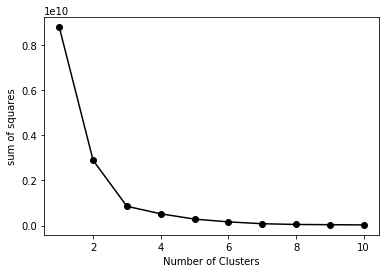

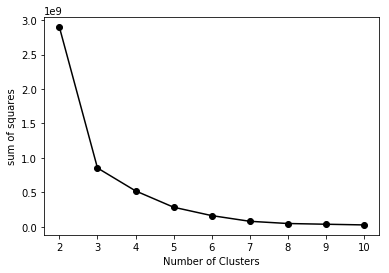

In [15]:
world_bank_data = world_bank_data.apply(pd.to_numeric)
sos = []
sos.append(round((world_bank_data.shape[0]-1) * sum(world_bank_data.var())))

for i in range(2,11):
    model = KMeans(n_clusters=i).fit(world_bank_data)
    sos.append(round(model.inertia_))

plt.plot(range(1,11),sos,'-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("sum of squares")
plt.show()

plt.plot(range(2,11),sos[1:],'-ok')
plt.xlabel("Number of Clusters")
plt.ylabel("sum of squares")
plt.show()

#Note: FITKmeans algo is missing here


In [16]:
world_bank_data.head()
k = 6
world_bank_6k_cluster = KMeans(n_clusters=k).fit(world_bank_data)
#print(world_bank_6k_cluster.labels_)
world_bank_6k_cluster_33 = KMeans(n_clusters=k,random_state= 33).fit(world_bank_data)
print(len(world_bank_country))
world_bank_country['label'] =  world_bank_6k_cluster_33.labels_
#print(world_bank_6k_cluster_33.labels_)

cm_temp = pd.crosstab(world_bank_country['Country'],world_bank_country['label'])
print(cm_temp)


45
label                   0  1  2  3  4  5
Country                                 
Angola                  0  1  0  0  0  0
Antigua and Barbuda     0  0  0  0  1  0
Azerbaijan              0  1  0  0  0  0
Bangladesh              0  1  0  0  0  0
Bosnia and Herzegovina  0  1  0  0  0  0
Botswana                0  1  0  0  0  0
Brazil                  0  0  0  0  1  0
Chad                    0  1  0  0  0  0
Dominican Republic      0  1  0  0  0  0
Ecuador                 0  1  0  0  0  0
Egypt, Arab Rep.        0  1  0  0  0  0
El Salvador             0  1  0  0  0  0
Equatorial Guinea       0  0  0  0  1  0
Georgia                 0  1  0  0  0  0
Greece                  0  0  0  1  0  0
Guatemala               0  1  0  0  0  0
Guinea-Bissau           0  1  0  0  0  0
Honduras                0  1  0  0  0  0
Hungary                 0  0  0  0  1  0
Iraq                    0  1  0  0  0  0
Italy                   1  0  0  0  0  0
Jamaica                 0  1  0  0  0  0
Kuwait       

In [17]:
clust_size = pd.Series(world_bank_6k_cluster.labels_).value_counts()
print(clust_size)
print(world_bank_6k_cluster.cluster_centers_)
print(world_bank_data.columns)
world_bank_data_aggregate = world_bank_data
world_bank_data_aggregate['label'] = world_bank_6k_cluster.labels_
pci = world_bank_data_aggregate[['Per.capita.income','label']].groupby('label').mean()
print(pci)
l = world_bank_data_aggregate[['Literacy','label']].groupby('label').mean()
print(l)
im = world_bank_data_aggregate[['Infant.mortality','label']].groupby('label').mean()
print(im)
ie = world_bank_data_aggregate[['Life.expectancy','label']].groupby('label').mean()
print(ie)
cm_3 = pd.crosstab(world_bank_data_aggregate['Per.capita.income'],world_bank_data_aggregate['label'])
print(cm_3)

0    24
3    10
5     6
1     3
4     1
2     1
dtype: int64
[[6.80571281e+01 3.23250000e+01 2.85120365e+03 8.14043021e+01]
 [8.01177724e+01 4.56666667e+00 2.82210918e+04 9.75784867e+01]
 [8.26463415e+01 2.10000000e+00 5.28887447e+04 9.65401500e+01]
 [7.16461415e+01 2.38100000e+01 8.84824656e+03 9.45413480e+01]
 [7.85968049e+01 6.80000000e+00 7.46671971e+04 9.74778500e+01]
 [7.65844065e+01 8.48333333e+00 1.82295387e+04 9.79640383e+01]]
Index(['Life.expectancy', 'Infant.mortality', 'Per.capita.income', 'Literacy'], dtype='object')
       Per.capita.income
label                   
0            2851.203649
1           28221.091830
2           52888.744670
3            8848.246564
4           74667.197070
5           18229.538742
        Literacy
label           
0      81.404302
1      97.578487
2      96.540150
3      94.541348
4      97.477850
5      97.964038
       Infant.mortality
label                  
0             32.325000
1              4.566667
2              2.100000
3       

[0 5 0 0 0 3 3 0 3 3 0 0 3 0 5 0 0 0 3 0 1 0 1 0 0 3 0 0 3 4 5 0 0 2 5 1 0
 0 5 3 3 0 5 0 0]


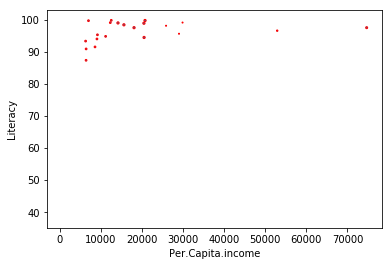

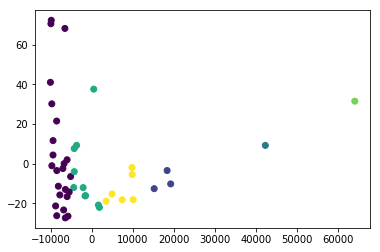

In [20]:
print(world_bank_6k_cluster.labels_)
#sns.pairplot(world_bank_data_aggregate)
plt.scatter(world_bank_data_aggregate['Per.capita.income'],world_bank_data_aggregate['Literacy'],s=world_bank_6k_cluster.labels_,edgecolors='red')
plt.xlabel('Per.Capita.income')
plt.ylabel('Literacy')
plt.show()
pca_temp = PCA(2)
plot_colms = pca_temp.fit_transform(world_bank_data)
plt.scatter(x=plot_colms[:,0],y=plot_colms[:,1],c=world_bank_data['label'])
plt.show()

In [21]:
k = 4
#world_bank_data.head()
world_bank_4k_cluster = kmedoids.kmedoids(world_bank_data,k)

NameError: name 'kmedoids' is not defined

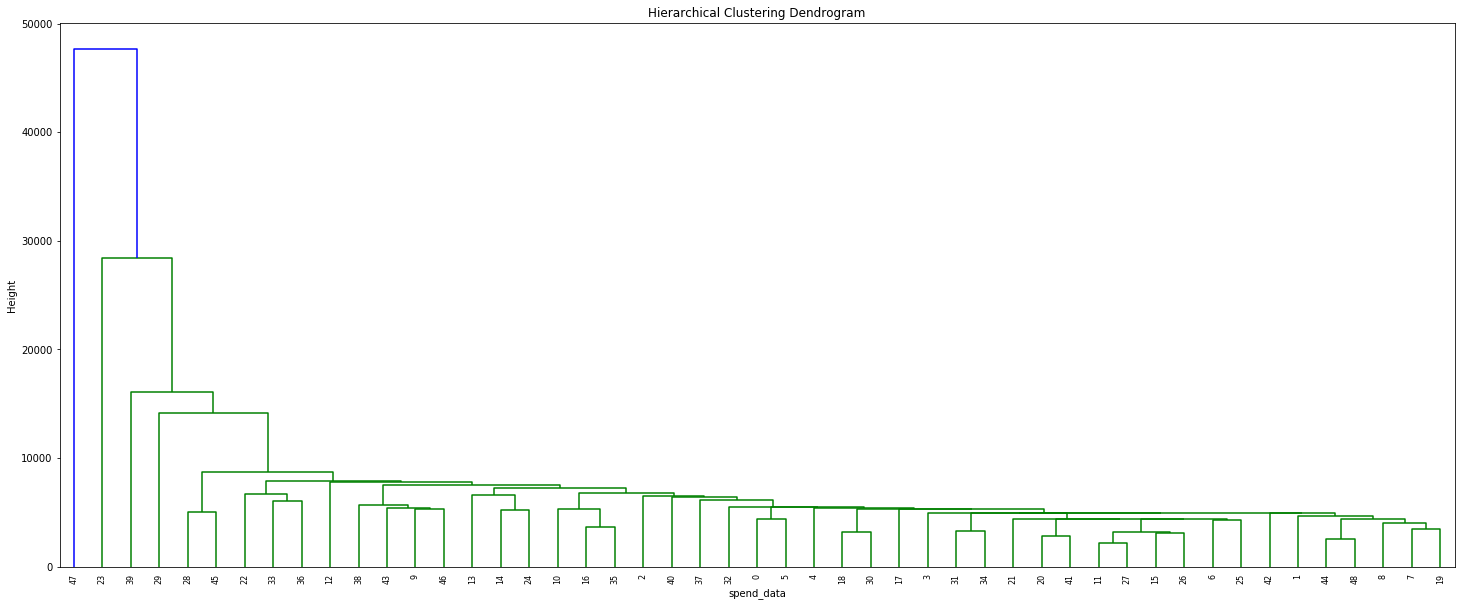

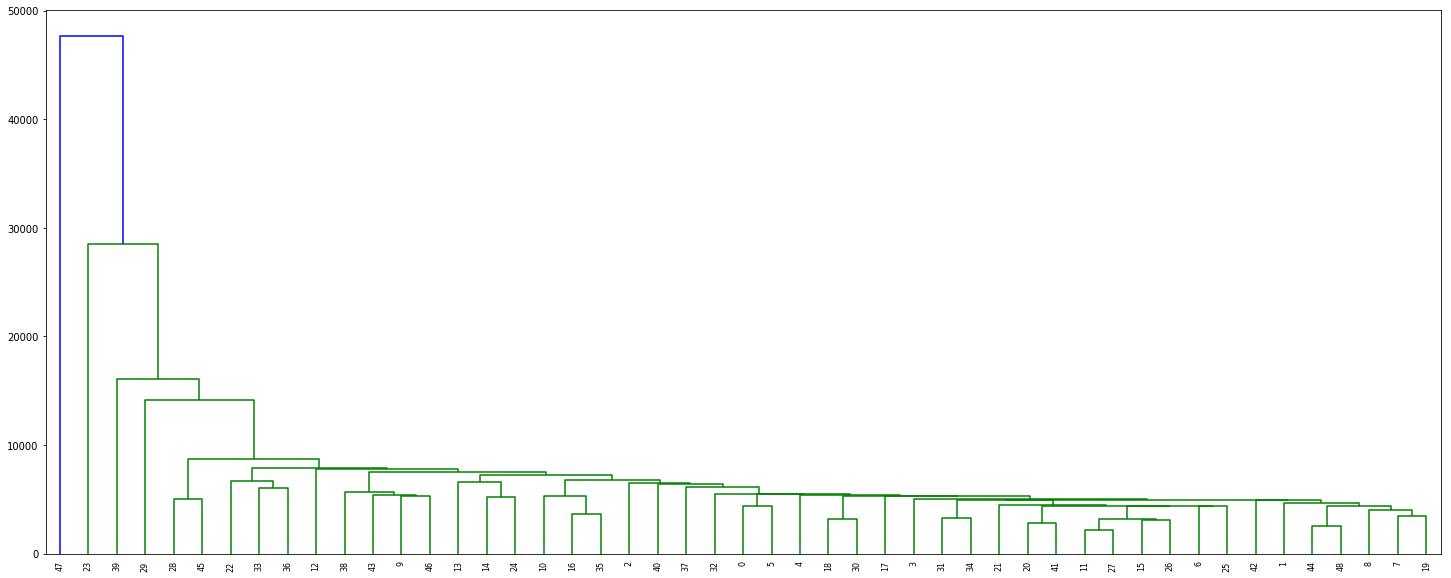

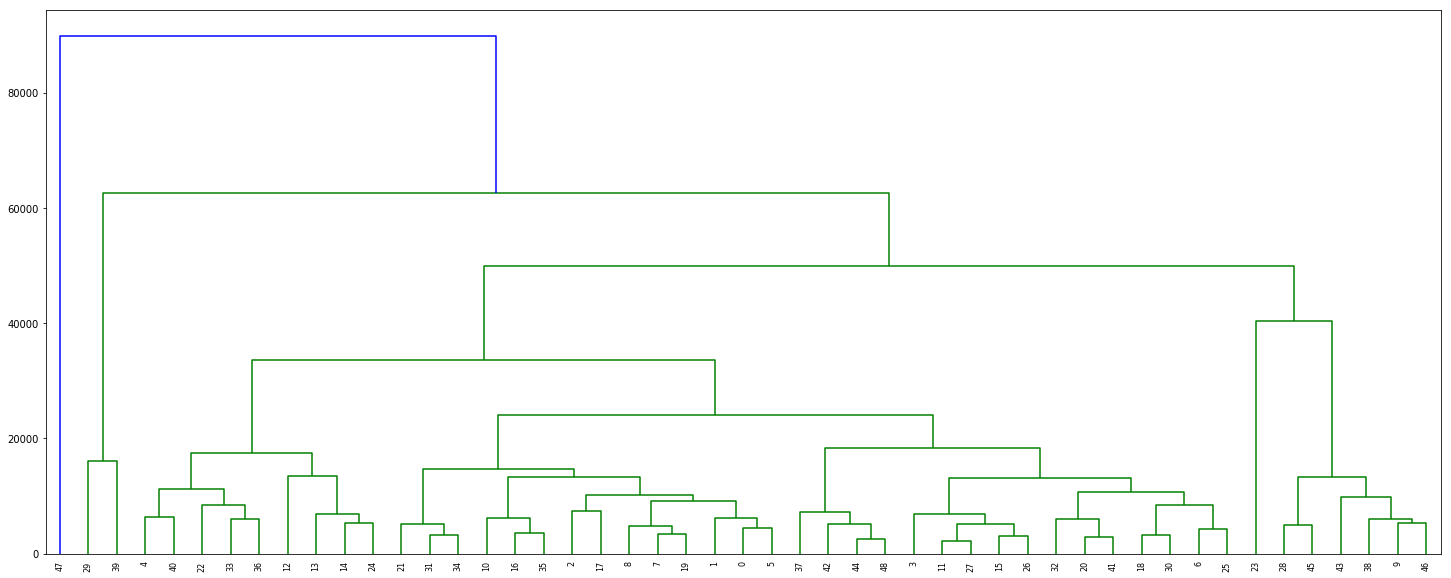

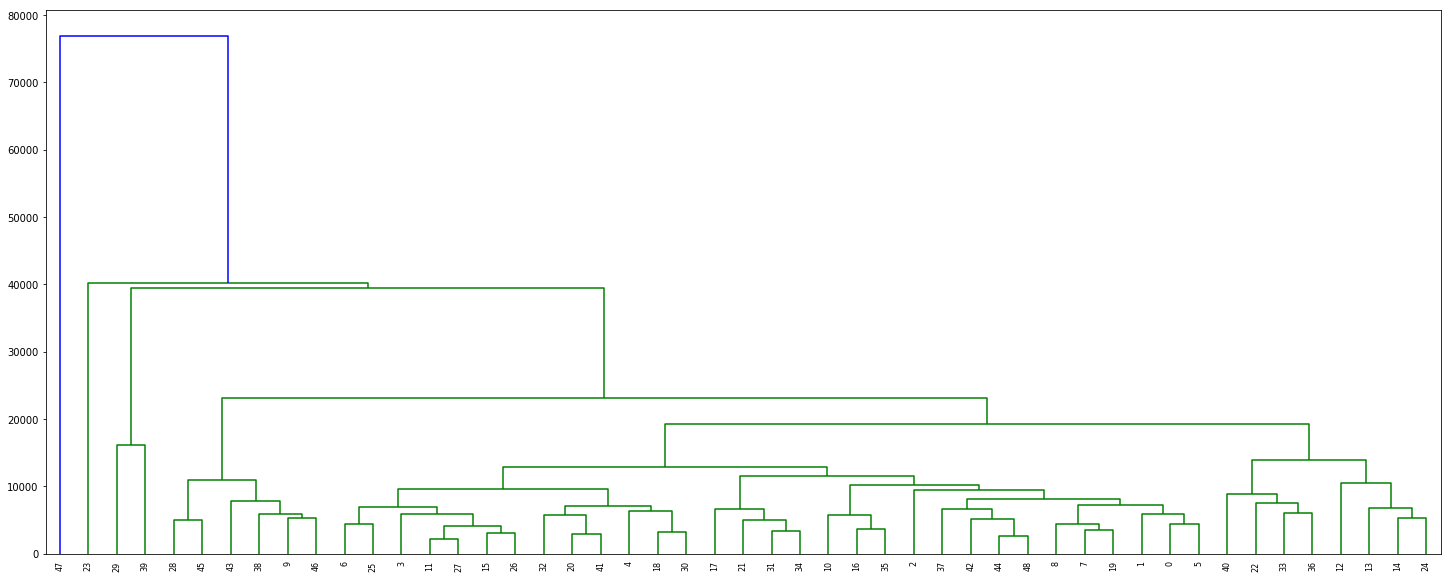

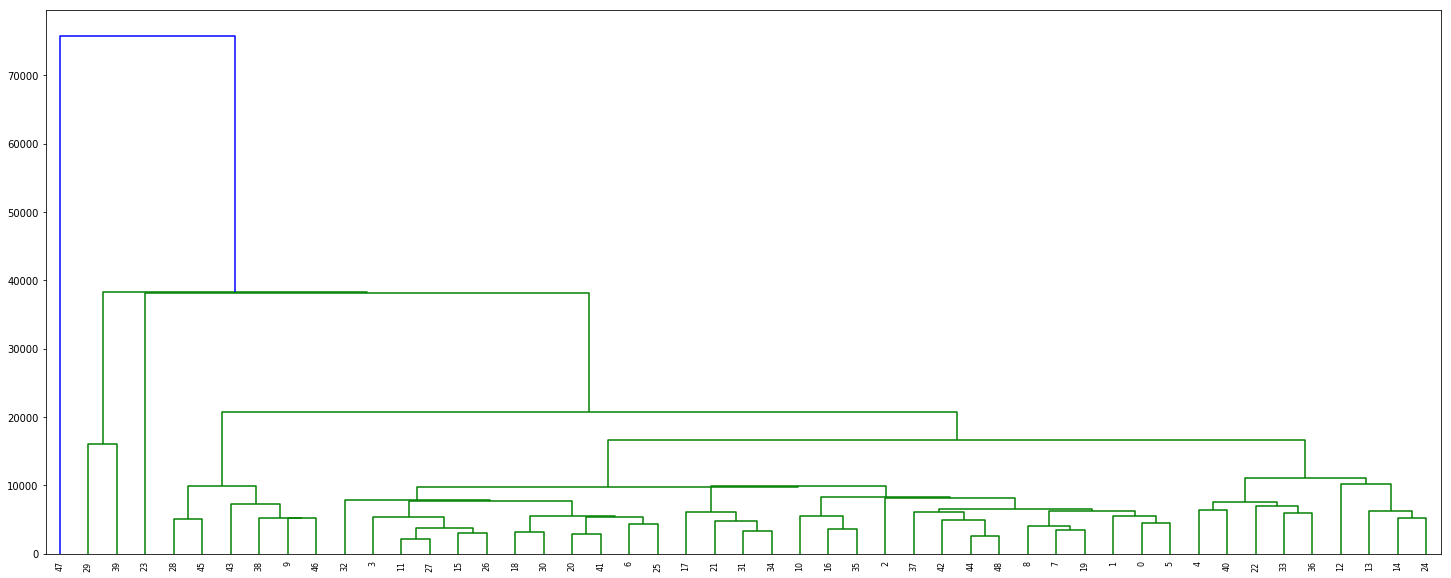

In [26]:
spend_data.head()
spend_h_cluster = linkage(spend_data)
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
dendrogram(spend_h_cluster,leaf_rotation=90.,leaf_font_size=8.)
plt.show()
spend_h_cluster_si = linkage(spend_data,method='single')
spend_h_cluster_co = linkage(spend_data,method='complete')
spend_h_cluster_av = linkage(spend_data,method='average')
spend_h_cluster_ce = linkage(spend_data,method='centroid')
plt.figure(figsize=(25, 10))
dendrogram(spend_h_cluster_si,leaf_rotation=90.,leaf_font_size=8.)
plt.show()
plt.figure(figsize=(25, 10))
dendrogram(spend_h_cluster_co,leaf_rotation=90.,leaf_font_size=8.)
plt.show()
plt.figure(figsize=(25, 10))
dendrogram(spend_h_cluster_av,leaf_rotation=90.,leaf_font_size=8.)
plt.show()
plt.figure(figsize=(25, 10))
dendrogram(spend_h_cluster_ce,leaf_rotation=90.,leaf_font_size=8.)
plt.show()

In [ ]:
#shows rectangle for each cluster in the dedrogram which is not possible in python

   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0       1  12669  9656     7561     214              2674        1338   
1       2   7057  9810     9568    1762              3293        1776   
2       3   6353  8808     7684    2405              3516        7844   
3       4  13265  1196     4221    6404               507        1788   
4       5  22615  5410     7198    3915              1777        5185   

   cut_tree  
0         0  
1         1  
2         1  
3         0  
4         2  
                 Fresh          Milk       Grocery        Frozen  \
cut_tree                                                           
0         13096.400000   3195.600000   5265.000000   1800.600000   
1          6242.117647   5075.647059   7176.764706   1433.588235   
2         22757.333333   3686.666667   4947.000000   4563.666667   
3         20396.000000   9849.000000  14853.000000   1864.000000   
4         24653.000000   9465.000000  12091.000000    294.000000   
7

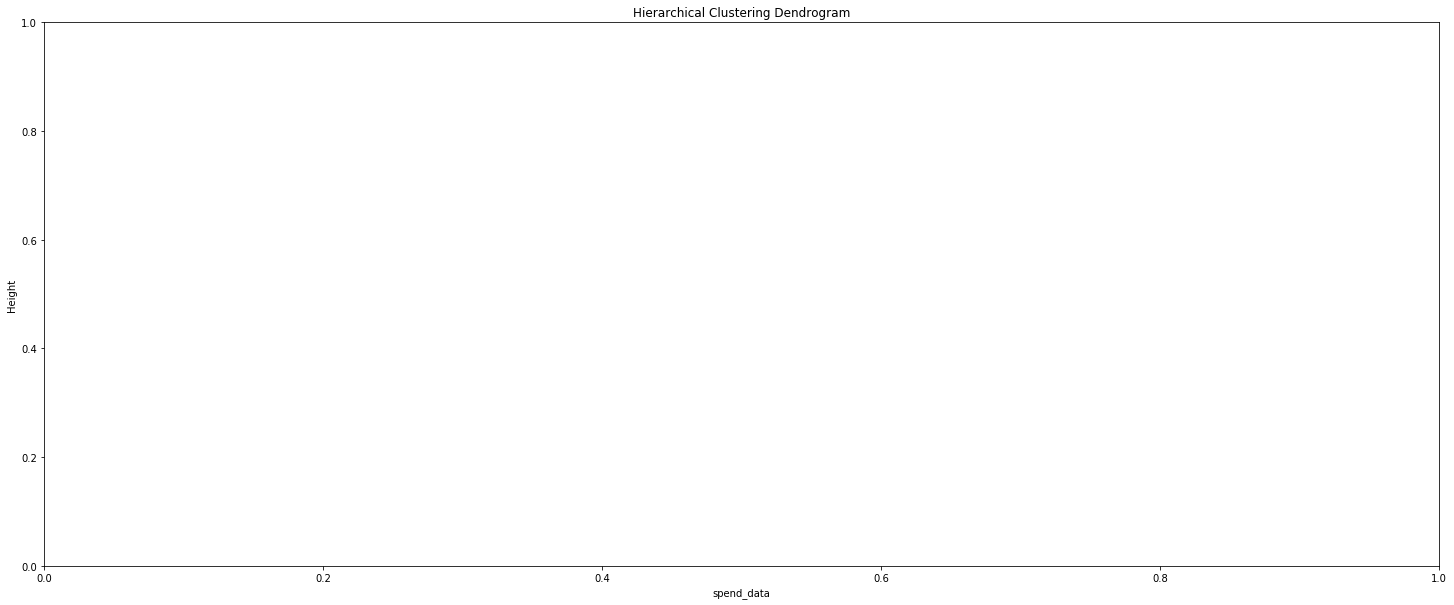

<Figure size 1800x720 with 0 Axes>

In [57]:
h_c = linkage(spend_data,method="average")
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Height')
plt.xlabel('spend_data')
#dendrogram(h_c,leaf_rotation=90.,leaf_font_size=10.)
#plt.show()

h_c = linkage(spend_data**2, method="centroid")
plt.figure(figsize=(25, 10))
memb = cut_tree(h_c,n_clusters=20)
memb_temp = [i[0] for i in memb]
#cent = null
spend_data['cut_tree'] = pd.Series(memb_temp)
#print(spend_data.head())
sample_data = spend_data.iloc[:,1:].groupby('cut_tree').mean()
print(sample_data.head(100))
#print(memb_temp)
#for k in range(0,20):
    #spend_data[:,1:]